In [6]:
import time
import pickle
import numpy as np
from src.environment import StockTradingEnvironment
from src.utils import save_pickle, load_pickle, plot_grid
from src.learner import q_learning_learning_loop
import yfinance as yf

In [7]:
# yfinance download data
def fetch_stock_data(symbol, start_date, end_date, output_file):
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    stock_data['Close'] = stock_data['Adj Close']
    
    stock_data = stock_data.drop(columns=['Adj Close'])

    stock_data.to_csv(output_file)
        
    return stock_data

stock_data = fetch_stock_data('AAPL', '2022-01-01', '2024-06-19', 'AAPL_data.csv')

[*********************100%%**********************]  1 of 1 completed


#### Q-Learning

In [8]:
# NOTE: You can adjust the parameter 'number_of_days_to_consider'

stock_trading_environment = StockTradingEnvironment('./AAPL_data.csv', number_of_days_to_consider=30)

In [9]:
agent, reward_across_episodes, epsilons_across_episodes = q_learning_learning_loop(stock_trading_environment,learning_rate=0.5, discount_factor=0.9, 
                                                                        episodes=20000, min_epsilon_allowed=0.05, initial_epsilon_value=1)

Initial Q-Table; [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


Trained Q-Table; [[ 7.05416098 -4.78715047  3.86063458]
 [-6.02207216  6.5056671   3.35533897]
 [ 6.65247599 -4.50427072  1.28758765]
 [-5.30150841  6.62295193 -3.00243041]]


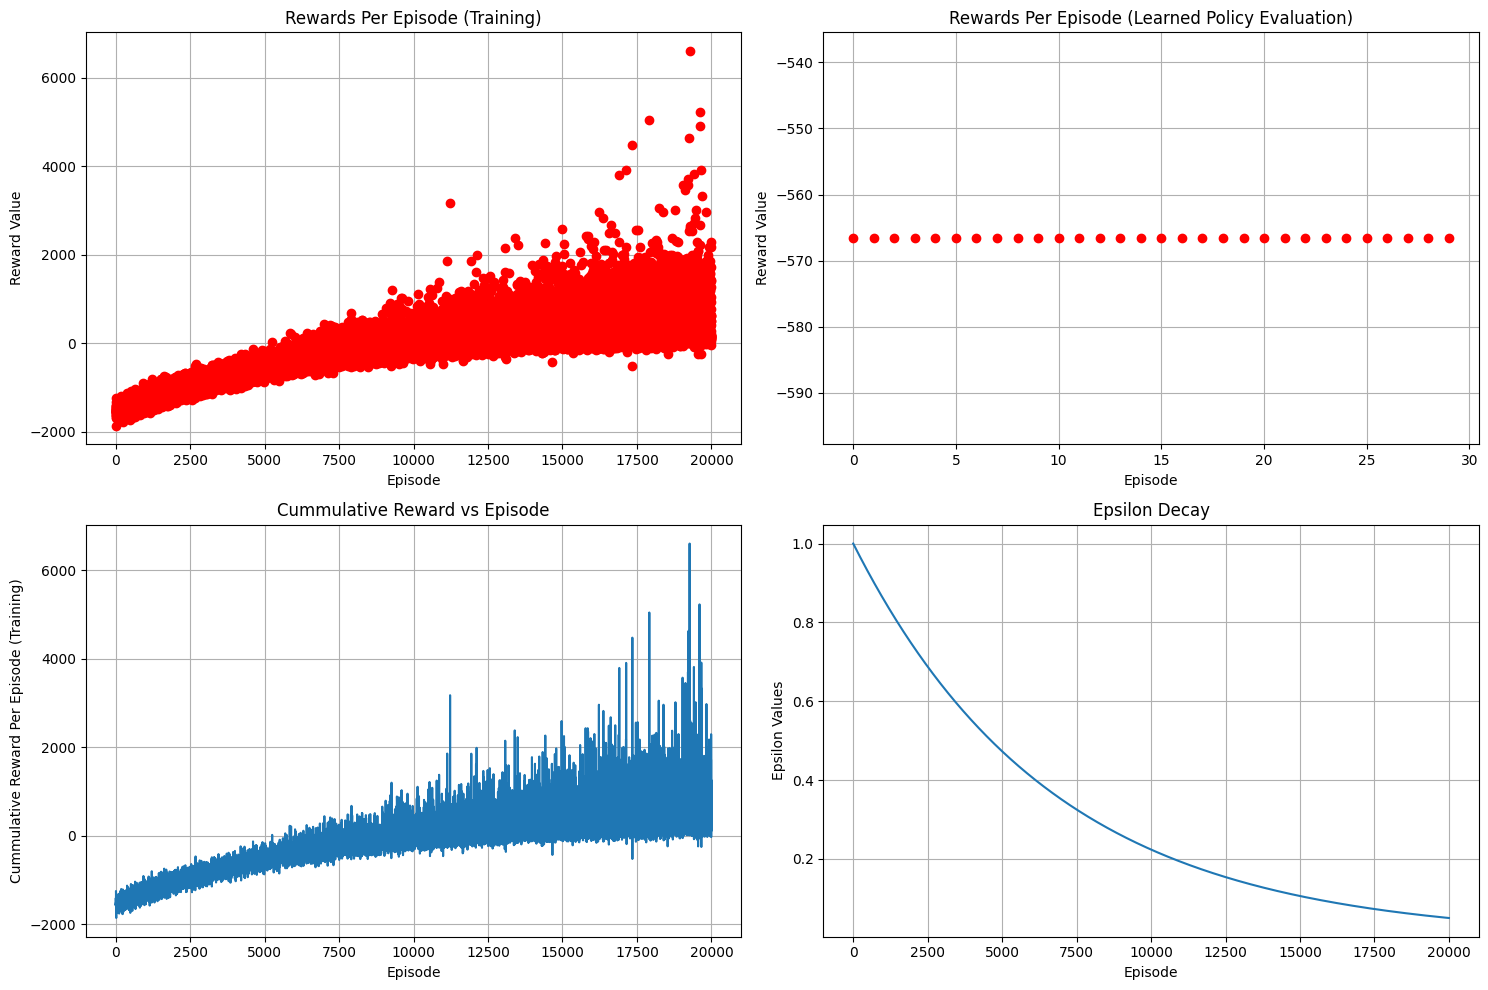

In [10]:
plot_grid(stock_trading_environment, agent, reward_across_episodes, epsilons_across_episodes)

In [ ]:
stock_trading_environment = StockTradingEnvironment('./AAPL_data.csv', number_of_days_to_consider=30)
stock_trading_environment.train = False
obs, _ = stock_trading_environment.reset()
terminated, truncated = False, False
while not terminated:
    action = np.argmax(agent.q_table[np.argmax(obs),:])
    obs, reward, terminated, truncated, info = stock_trading_environment.step(action)

stock_trading_environment.render()

In [ ]:
save_pickle(agent, 'stock_env_q_learning_agent.pkl')

#### Forecast

In [ ]:
agent = load_pickle("stock_env_q_learning_agent.pkl")

In [ ]:
stock_trading_environment = StockTradingEnvironment('./AAPL_data.csv', number_of_days_to_consider=10)
stock_trading_environment.train = False
obs, _ = stock_trading_environment.reset()
terminated, truncated = False, False
while not terminated:
    action = np.argmax(agent.q_table[np.argmax(obs),:])
    obs, reward, terminated, truncated, info = stock_trading_environment.step(action)

stock_trading_environment.render()